#### K-Nearest Neighbors on photos of sculpture heads (Dr. Tenenbaum)
* classify the photos based on head-facing direction

In [1]:
import scipy.io
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# load the images
flc = '/Users/pinqingkan/Desktop/Codes/Course_edX_PythonDataScience/Lab4_DimensionalityReduction/Datasets/'
fname = flc + 'face_data.mat'
data = scipy.io.loadmat(fname)
# four variables in the dataset
image_pcs = data['image_pcs']
images = data['images']
lights = data['lights']
poses = data['poses']

In [3]:
# reshape the image matrices
Npixel, Nimage = images.shape
Npixel = int(math.sqrt(Npixel))
X = np.zeros((Nimage, Npixel*Npixel))
for i in range(Nimage):
    X[i,:] = np.rot90(images[:,i].reshape(Npixel, Npixel), 3).reshape(-1)

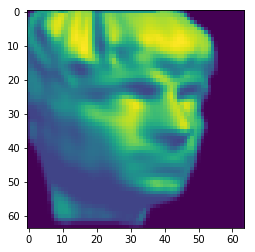

In [4]:
# plot the original images - see if make sense
plt.imshow(X[0,:].reshape(Npixel, Npixel))
plt.show()

In [5]:
# load the labels of the images
flc = '/Users/pinqingkan/Desktop/DataScience/PythonDataScience/DAT210x-master/Module5/Datasets/'
fname = flc + 'face_labels.csv'
Y = pd.read_csv(fname, header = None)
Y = Y.iloc[:,0]

In [6]:
# split the datasets into training & testing data
# random_state = 7 to ensure repeatable results; skiped in real cases
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 7)

In [7]:
# train the PCA using the normalized training data & do PCA
# for visualization purpose
pca = PCA(n_components = 2, svd_solver = 'full')
pca.fit(X_train)
Z_train = pca.transform(X_train)
Z_test = pca.transform(X_test)

In [8]:
# train the isomap using the normalized training data & do isomap
# for visualization purpose
iso = Isomap(n_neighbors = 5, n_components = 2, eigen_solver = 'auto', max_iter = None,
             neighbors_algorithm = 'auto', path_method = 'auto', tol = 0)
iso.fit(X_train)
W_train = iso.transform(X_train)
W_test = iso.transform(X_test)

In [9]:
# apply KNeighbors on training data (normalized, PCA)
for K in np.arange(1, 21, 1):
    knc = KNeighborsClassifier(n_neighbors = K)
    knc.fit(Z_train, Y_train)
    # show the accuracy score
    print(K, knc.score(Z_test, Y_test))

1 0.619047619048
2 0.6
3 0.609523809524
4 0.580952380952
5 0.571428571429
6 0.590476190476
7 0.6
8 0.628571428571
9 0.628571428571
10 0.6
11 0.580952380952
12 0.619047619048
13 0.6
14 0.590476190476
15 0.590476190476
16 0.580952380952
17 0.590476190476
18 0.561904761905
19 0.580952380952
20 0.6


In [10]:
# apply KNeighbors on training data (normalized, isomap)
for K in np.arange(1, 21, 1):
    knc = KNeighborsClassifier(n_neighbors = K)
    knc.fit(W_train, Y_train)
    # show the accuracy score
    print(K, knc.score(W_test, Y_test))

1 0.980952380952
2 0.961904761905
3 0.961904761905
4 0.961904761905
5 0.961904761905
6 0.961904761905
7 0.971428571429
8 0.980952380952
9 0.961904761905
10 0.990476190476
11 0.980952380952
12 0.990476190476
13 0.990476190476
14 0.990476190476
15 0.980952380952
16 0.980952380952
17 0.980952380952
18 0.980952380952
19 0.980952380952
20 0.990476190476


In [11]:
K = 10
knc = KNeighborsClassifier(n_neighbors = K)
knc.fit(W_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

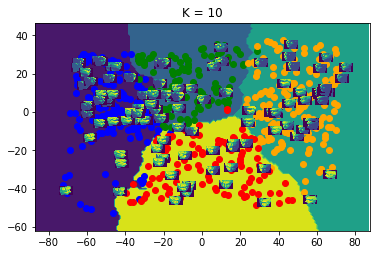

In [12]:
# plot a classified contour

# the range of the contour
xmin, xmax = W_train[:,0].min(), W_train[:,0].max()
ymin, ymax = W_train[:,1].min(), W_train[:,1].max()
x_range = xmax - xmin
y_range = ymax - ymin
padding = 0.1
xmin -= x_range * padding
ymin -= y_range * padding
xmax += x_range * padding
ymax += y_range * padding

# the grids of the contour
resolution = 1
xx, yy = np.meshgrid(np.arange(xmin, xmax, resolution),
                     np.arange(ymin, ymax, resolution))

# show the classified contour
zz = knc.predict(np.c_[xx.ravel(), yy.ravel()])
zz = zz.reshape(xx.shape)
plt.figure()
plt.contourf(xx, yy, zz)
colors = ['blue','green','orange','red']
for label in range(len(np.unique(Y_train))):
    indices = np.where(Y_train == label)
    plt.scatter(W_train[indices,0], W_train[indices,1], c = colors[label])
plt.title('K = ' + str(K))

# show the classified test data
xwin = x_range*.05
ywin = y_range*.05
img = 0
for i in Y_test.index:
    x0, y0 = W_test[img,0]-xwin/2., W_test[img,1]-ywin/2.
    x1, y1 = W_test[img,0]+xwin/2., W_test[img,1]+ywin/2.
    img += 1
    plt.imshow(X[i,:].reshape(Npixel, Npixel), extent = (x0, x1, y0, y1), zorder=100000)

plt.axis([xmin, xmax, ymin, ymax])
plt.show()